# Q1) Build a Classification Model Using a Neural Network

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import zipfile

In [ ]:
# Unzipping the dataset
zip_path = '/content/pets.zip'
extracted_path = '/content/pets'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)



In [5]:
# Set up paths
data_dir = '/content/pets'

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1734 images belonging to 2 classes.
Found 741 images belonging to 2 classes.


In [57]:
validation_generator.class_indices.keys()

dict_keys(['cane', 'carpa'])

In [10]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
55/55 [==============================] - 14s 113ms/step - loss: 0.6130 - accuracy: 0.6742 - val_loss: 0.4115 - val_accuracy: 0.8178
Epoch 2/25
55/55 [==============================] - 4s 74ms/step - loss: 0.4065 - accuracy: 0.8351 - val_loss: 0.3443 - val_accuracy: 0.8529
Epoch 3/25
55/55 [==============================] - 4s 69ms/step - loss: 0.3300 - accuracy: 0.8633 - val_loss: 0.2930 - val_accuracy: 0.8637
Epoch 4/25
55/55 [==============================] - 5s 84ms/step - loss: 0.2687 - accuracy: 0.9008 - val_loss: 0.2818 - val_accuracy: 0.8758
Epoch 5/25
55/55 [==============================] - 4s 73ms/step - loss: 0.2211 - accuracy: 0.9123 - val_loss: 0.2424 - val_accuracy: 0.8974
Epoch 6/25
55/55 [==============================] - 4s 77ms/step - loss: 0.1808 - accuracy: 0.9337 - val_loss: 0.1913 - val_accuracy: 0.9136
Epoch 7/25
55/55 [==============================] - 4s 81ms/step - loss: 0.1767 - accuracy: 0.9302 - val_loss: 0.2286 - val_accuracy: 0.9136
Epoch 8/25


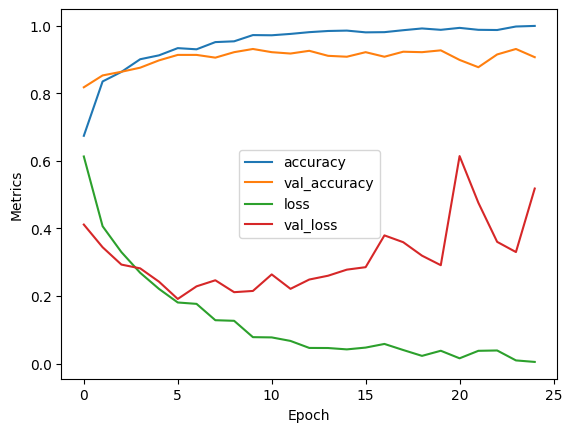

In [13]:

# Plotting training and validation metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


24/24 [==============================] - 3s 118ms/step


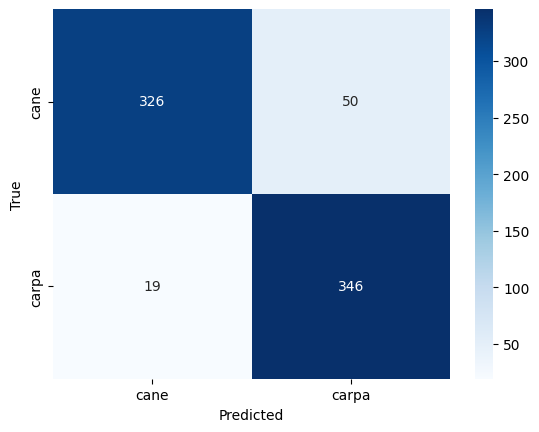

              precision    recall  f1-score   support

        cane       0.94      0.87      0.90       376
       carpa       0.87      0.95      0.91       365

    accuracy                           0.91       741
   macro avg       0.91      0.91      0.91       741
weighted avg       0.91      0.91      0.91       741



In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


# Try to imporove the result.

In [86]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.3)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1734 images belonging to 2 classes.
Found 741 images belonging to 2 classes.


In [87]:
validation_generator.class_indices.keys()

dict_keys(['cane', 'carpa'])

In [88]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 64)       

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [90]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
55/55 [==============================] - 35s 606ms/step - loss: 0.6668 - accuracy: 0.5894 - val_loss: 0.5109 - val_accuracy: 0.7706
Epoch 2/25
44/55 [=======================>......] - ETA: 4s - loss: 0.5348 - accuracy: 0.7323

KeyboardInterrupt: 

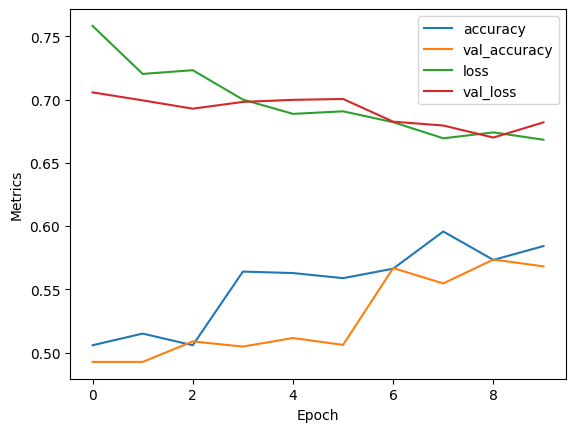

In [91]:
# Plotting training and validation metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [92]:
model_eval = model.evaluate(validation_generator)

24/24 [==============================] - 9s 374ms/step - loss: 0.5505 - accuracy: 0.7247


24/24 [==============================] - 10s 403ms/step


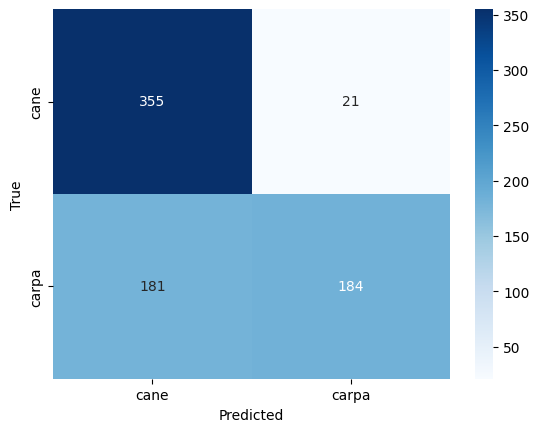

              precision    recall  f1-score   support

        cane       0.66      0.94      0.78       376
       carpa       0.90      0.50      0.65       365

    accuracy                           0.73       741
   macro avg       0.78      0.72      0.71       741
weighted avg       0.78      0.73      0.71       741



In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


## Model 2 (I don't able to train too much because it takes too much time)

In [61]:
from keras import layers
import keras

In [72]:
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load EfficientNetB1 with ImageNet weights
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)


# Freeze the base model layers for initial training
for layer in base_model.layers:
    layer.trainable = False


# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


KeyboardInterrupt: 

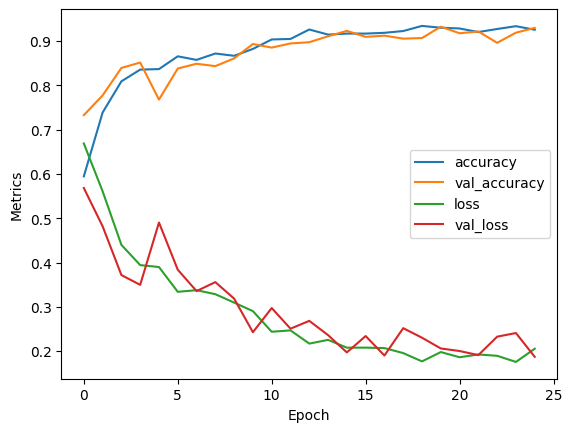

In [63]:
# Plotting training and validation metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [64]:
model2_eval = model2.evaluate(validation_generator)

24/24 [==============================] - 10s 423ms/step - loss: 0.7041 - accuracy: 0.5074


24/24 [==============================] - 12s 425ms/step


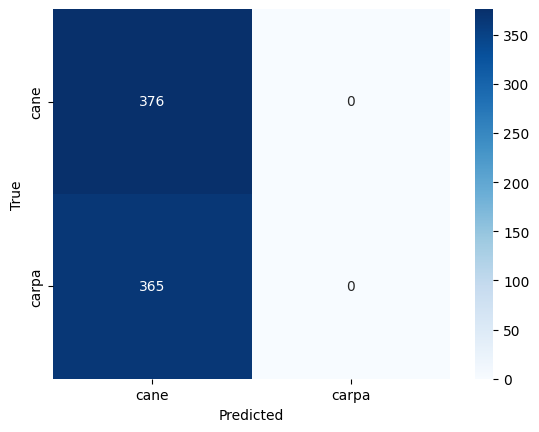

              precision    recall  f1-score   support

        cane       0.51      1.00      0.67       376
       carpa       0.00      0.00      0.00       365

    accuracy                           0.51       741
   macro avg       0.25      0.50      0.34       741
weighted avg       0.26      0.51      0.34       741



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
validation_generator.reset()
predictions = model2.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


# Fine-Tuning

In [73]:
# Load EfficientNetB1 with ImageNet weights
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model2= Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers for initial training
for layer in base_model.layers:
    layer.trainable = False
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[:200]:
    layer.trainable = False
for layer in base_model.layers[200:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning

model2.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10
total_epochs = 10
history = model2.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
55/55 [==============================] - 61s 661ms/step - loss: 0.7583 - accuracy: 0.5058 - val_loss: 0.7058 - val_accuracy: 0.4926
Epoch 2/10
55/55 [==============================] - 33s 606ms/step - loss: 0.7204 - accuracy: 0.5150 - val_loss: 0.6994 - val_accuracy: 0.4926
Epoch 3/10
55/55 [==============================] - 37s 672ms/step - loss: 0.7233 - accuracy: 0.5058 - val_loss: 0.6929 - val_accuracy: 0.5088
Epoch 4/10
55/55 [==============================] - 36s 655ms/step - loss: 0.7001 - accuracy: 0.5640 - val_loss: 0.6982 - val_accuracy: 0.5047
Epoch 5/10
55/55 [==============================] - 33s 606ms/step - loss: 0.6888 - accuracy: 0.5629 - val_loss: 0.6998 - val_accuracy: 0.5115
Epoch 6/10
55/55 [==============================] - 40s 729ms/step - loss: 0.6908 - accuracy: 0.5588 - val_loss: 0.7005 - val_accuracy: 0.5061
Epoch 7/10
55/55 [==============================] - 41s 755ms/step - loss: 0.6822 - accuracy: 0.5663 - val_loss: 0.6826 - val_accuracy: 0.5668

[0.5057669878005981,
 0.514994204044342,
 0.5057669878005981,
 0.5640138387680054,
 0.5628604292869568,
 0.5588235259056091,
 0.5663206577301025,
 0.5957323908805847,
 0.5732410550117493,
 0.5841983556747437]

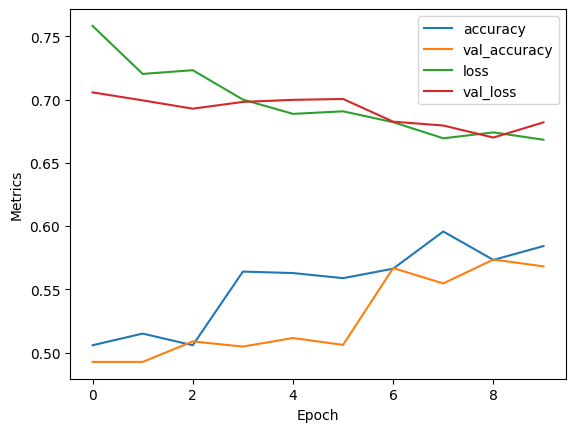

In [78]:
# Plotting training and validation metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [79]:
model2_eval = model2.evaluate(validation_generator)

24/24 [==============================] - 9s 365ms/step - loss: 0.6835 - accuracy: 0.5479


24/24 [==============================] - 12s 418ms/step


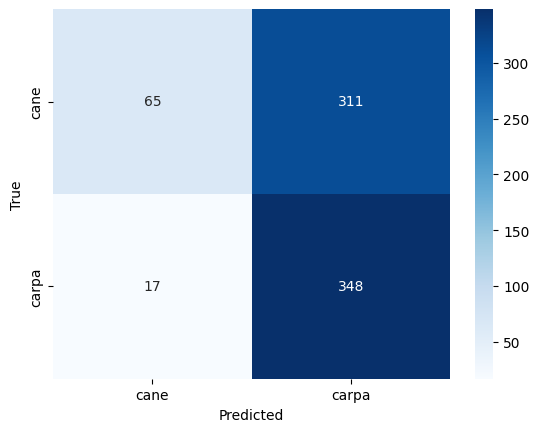

              precision    recall  f1-score   support

        cane       0.79      0.17      0.28       376
       carpa       0.53      0.95      0.68       365

    accuracy                           0.56       741
   macro avg       0.66      0.56      0.48       741
weighted avg       0.66      0.56      0.48       741



In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
validation_generator.reset()
predictions = model2.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)




# Testing Model 1

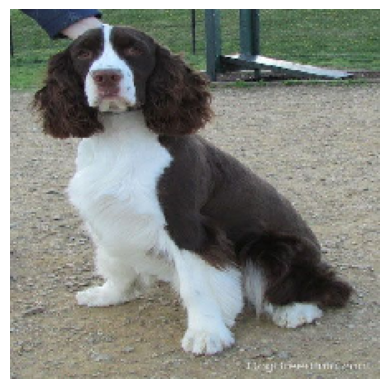

In [94]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit expected input shape
img_array = img_array / 255.0  # Rescale to [0,1]

# Display the image (optional)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


In [96]:
# Predict class probabilities
predictions = model.predict(img_array)

# Decode the predictions (assuming 'class_indices' mapping is available)
class_indices = train_generator.class_indices  # Replace with your class indices mapping
predicted_class = np.argmax(predictions, axis=1)
class_label = list(class_indices.keys())[predicted_class[0]]

print(f'Predicted class: {class_label}')
print(f'Confidence: {predictions[0][predicted_class[0]] * 100:.2f}%')


1/1 [==============================] - 1s 673ms/step
Predicted class: cane
Confidence: 94.41%


# Testing Model 2

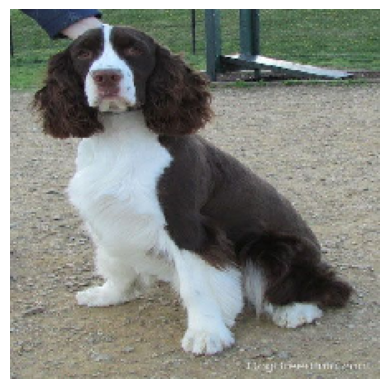

In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit expected input shape
img_array = img_array / 255.0  # Rescale to [0,1]

# Display the image (optional)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


In [82]:
# Predict class probabilities
predictions = model2.predict(img_array)

# Decode the predictions (assuming 'class_indices' mapping is available)
class_indices = train_generator.class_indices  # Replace with your class indices mapping
predicted_class = np.argmax(predictions, axis=1)
class_label = list(class_indices.keys())[predicted_class[0]]

print(f'Predicted class: {class_label}')
print(f'Confidence: {predictions[0][predicted_class[0]] * 100:.2f}%')


1/1 [==============================] - 9s 9s/step
Predicted class: carpa
Confidence: 65.09%


# Result

It takes too much time so i am not able to train it